# Figures for the paper

In [1]:
from scipy.integrate import quad
from numpy import *
from matplotlib.pylab import *
import matplotlib as mpl
#from ipywidgets import interact, interactive, fixed, interact_manual
#import ipywidgets as widgets
%matplotlib inline


In [2]:
import PIL.Image as Image
import pickle

In [3]:
def plot_trace(data,t,ax=None,c='C0',band= None):
    if ax is None:
        ax = gca()
    vtracso = data*1.0
    vtracso.sort(axis=1)
    ax.plot(t,vtracso[:,250],c)
    if band == 0:
        pass
    elif band == 1:
        ax.fill_between(t,vtracso[:,79],vtracso[:,421],color=c,alpha=0.5)
    elif band ==2:
        ax.fill_between(t,vtracso[:,5],vtracso[:,495],color=c,alpha=0.2)
    else:
        ax.fill_between(t,vtracso[:,5],vtracso[:,495],color=c,alpha=0.2)
        ax.fill_between(t,vtracso[:,79],vtracso[:,421],color=c,alpha=0.5)
    return(ax)

In [4]:
from matplotlib.patches import ConnectionPatch

In [5]:
def getint(x):
    xc = x*1.0
    xc.sort()
    sh = xc.shape[0]
    xmed = xc[sh//2]
    s0= int(sh*(1-.6827)/2)
    s1 = sh-s0
    x0 = xc[s0]
    x1 = xc[s1]
    s0b= int(sh*(1-.95)/2)
    s1b = sh-s0b
    x0b = xc[s0b]
    x1b = xc[s1b]
    return((xmed,x0,x1,x0b,x1b))

In [6]:

with open("/mnt/data/gatinginfovslv2_Odiam_t.pickle","rb") as f:
    aph = pickle.load(f)
    

In [7]:
dsv = array([1,2,3,4,5,6,7,8,9])*7.5
dsvc = list(-1.0*dsv); dsvc.reverse()
dsv = concatenate((dsvc,[0],dsv))
diameters = arange(0.2,2.1,0.1)

In [8]:
labels = ['Vspine','Vsoma','Vdendrite','Ca']
EL0s = [-70,-70,-70,0]
nr = 1
shleh = {}
shleh0 = {}
for lab in labels:
    shleh[lab] = zeros((19,11,19))
    shleh0[lab] = zeros((19,11,19))
#                        dsv,?, diameters

for il,lab in enumerate(labels):
    EL0 = EL0s[il]
    for idiam in range(19):
        # columns: no inh, shaft inh, axo-spinal inh
        ap0 = aph[(lab,0.0,idiam)]-EL0

        #Effect very close to inh
        r0shaft = ap0[:,1]/ap0[:,0]
        r0axspi = ap0[:,2]/ap0[:,0]
        for j,dss in enumerate(dsv):
            ap = aph[(lab,dss,idiam)]-EL0
            rshaft = ap[:,1]/ap[:,0]
            raxspi = ap[:,2]/ap[:,0]
            difr = column_stack(((1-rshaft)/(1-r0shaft),(1-raxspi)/(1-r0axspi)))
            # difr = column_stack((rshaft,raxspi))
            shleh0[lab][j,1:,idiam] = concatenate((getint(difr[:,0]),getint(difr[:,1])))
            shleh0[lab][j,0,idiam] = dss
            difr[:,0] = difr[:,0]*(1-r0shaft)
            difr[:,1] = difr[:,1]*(1-r0axspi)
            shleh[lab][j,1:,idiam] = concatenate((getint(difr[:,0]),getint(difr[:,1])))
            shleh[lab][j,0,idiam] = dss

In [9]:
#@interact
def plot_Sv(ax,idiam = 0):
    lab = labels[0]
    axsp = 0
    ax.plot(shleh[lab][:,0,idiam],shleh[lab][:,1+axsp*5,idiam],'C3-',label='AD')
    ax.fill_between(shleh[lab][:,0,idiam],
                 shleh[lab][:,2+axsp*5,idiam],
                 shleh[lab][:,3+axsp*5,idiam],color='C3',alpha=0.7)

    axsp = 1
    ax.plot(shleh[lab][:,0,idiam],shleh[lab][:,1+axsp*5,idiam],'C2-',label='AS')
    ax.fill_between(shleh[lab][:,0,idiam],
                 shleh[lab][:,2+axsp*5,idiam],
                 shleh[lab][:,3+axsp*5,idiam],color='C2',alpha=0.7)

    ax.legend()
    ax.set_xlabel('$\Delta x$')
    ax.set_ylabel('$S_V$')
    #ax.set_ylim(-0.01,0.4)
    ax.annotate('D: %.1f $\mu m$' % diameters[idiam],xy = (-50,0.05))

In [10]:
#interact(plot_Sv(), x =widgets.IntSlider(min=0,max=19,step=1,value=0))

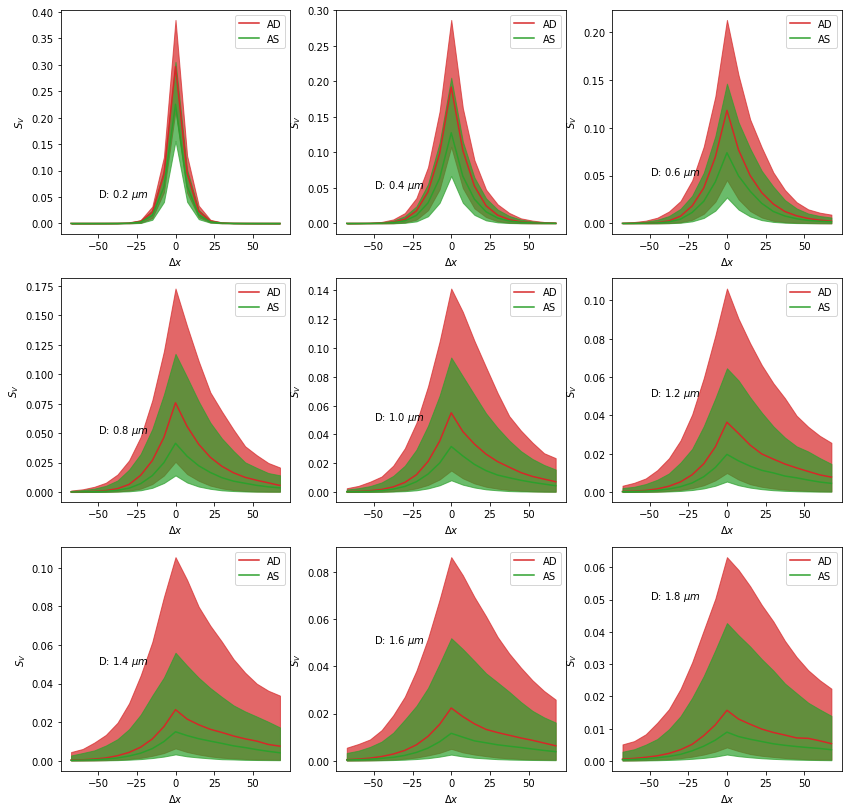

In [11]:
lab = labels[0]
fig,ax = subplots(3,3,figsize=(14,14))
for i in range(9):
    plot_Sv(ax[i//3,i%3],idiam = i*2)
fig.savefig('SM_Svvsdx_diam.png',dpi = 300)

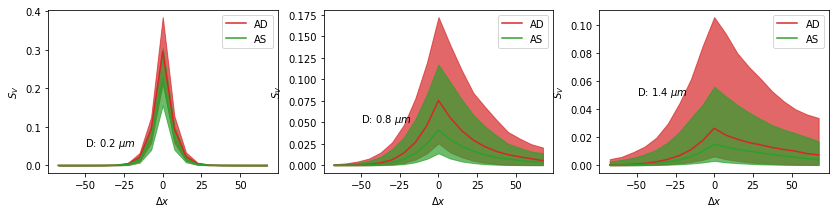

In [19]:
lab = labels[0]
fig,ax = subplots(1,3,figsize=(14,3))
for i in range(3):
    plot_Sv(ax[i%3],idiam = i*6)
fig.savefig('SM_Svvsdx_diam2.png',dpi = 300)

In [12]:
from scipy.stats import linregress

In [13]:
#lab = labels[0]
# axsp = 0
# ax.plot(shleh[lab][:,0,idiam],shleh[lab][:,1+axsp*5,idiam],'C3-',label='AD')
# ax.fill_between(shleh[lab][:,0,idiam],
#              shleh[lab][:,2+axsp*5,idiam],
#              shleh[lab][:,3+axsp*5,idiam],color='C3',alpha=0.7)

lvsdiam = zeros((18,9))
for idiam in range(18):
    axsp = 1
    xt,yt = shleh[lab][:,0,idiam],shleh[lab][:,1+axsp*5,idiam]
    sel = xt>0
    xt = xt[sel]*1.0
    yt = log(yt[sel])
    lm = linregress(xt,yt)
    lvsdiam[idiam,:3] = (diameters[idiam],-1./lm.slope,exp(lm.intercept))
    axsp = 0
    xt,yt = shleh[lab][:,0,idiam],shleh[lab][:,1+axsp*5,idiam]
    sel = xt>0
    xt = xt[sel]*1.0
    yt = log(yt[sel])
    lm = linregress(xt,yt)
    lvsdiam[idiam,3:5] = (-1./lm.slope,exp(lm.intercept))
    axsp = 1
    xt,yt = shleh[lab][:,0,idiam],shleh[lab][:,1+axsp*5,idiam]
    sel = xt<0
    xt = -xt[sel]*1.0
    yt = log(yt[sel])
    lm = linregress(xt,yt)
    lvsdiam[idiam,5:7] = (-1./lm.slope,exp(lm.intercept))
    axsp = 0
    xt,yt = shleh[lab][:,0,idiam],shleh[lab][:,1+axsp*5,idiam]
    sel = xt<0
    xt = -xt[sel]*1.0
    yt = log(yt[sel])
    lm = linregress(xt,yt)
    lvsdiam[idiam,7:] = (-1./lm.slope,exp(lm.intercept))

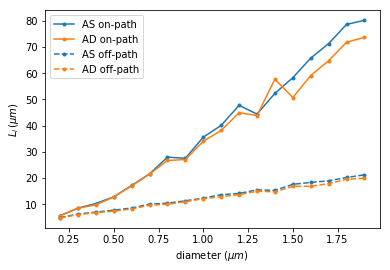

In [14]:
plot(lvsdiam[:,0],lvsdiam[:,1],'.-',label= 'AS on-path')
plot(lvsdiam[:,0],lvsdiam[:,3],'.-',label= 'AD on-path')
plot(lvsdiam[:,0],lvsdiam[:,5],'C0.--',label= 'AS off-path')
plot(lvsdiam[:,0],lvsdiam[:,7],'C1.--',label= 'AD off-path')

xlabel('diameter $(\mu m)$')
ylabel('$L_i\, (\mu m)$')
legend()
savefig('SM_Livsdenddiam.png',dpi = 300)

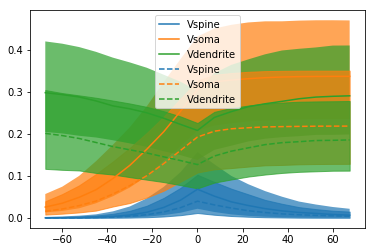

In [13]:
axsp = 0
for lab in labels[:-1]:
    plot(shleh[lab][:,0],shleh[lab][:,1+axsp*5],label=lab)
    fill_between(shleh[lab][:,0],shleh[lab][:,2+axsp*5],shleh[lab][:,3+axsp*5],alpha=0.7)
    
axsp = 1
for i,lab in enumerate(labels[:-1]):
    plot(shleh[lab][:,0],shleh[lab][:,1+axsp*5],'C'+str(i)+'--',label=lab)
    fill_between(shleh[lab][:,0],shleh[lab][:,2+axsp*5],shleh[lab][:,3+axsp*5],color='C'+str(i),alpha=0.7)
    
legend()

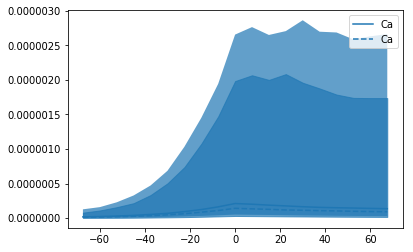

In [14]:
axsp = 0
for lab in labels[-1:]:
    plot(shleh[lab][:,0],shleh[lab][:,1+axsp*5],label=lab)
    fill_between(shleh[lab][:,0],shleh[lab][:,2+axsp*5],shleh[lab][:,3+axsp*5],alpha=0.7)
    
axsp = 1
for i,lab in enumerate(labels[-1:]):
    plot(shleh[lab][:,0],shleh[lab][:,1+axsp*5],'C'+str(i)+'--',label=lab)
    fill_between(shleh[lab][:,0],shleh[lab][:,2+axsp*5],shleh[lab][:,3+axsp*5],color='C'+str(i),alpha=0.7)
    
legend()

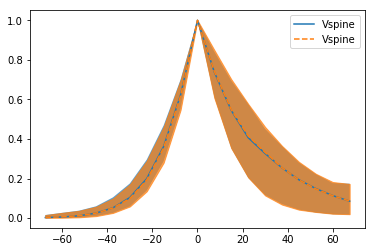

In [15]:
axsp = 0
for lab in labels[:1]:
    plot(shleh0[lab][:,0],shleh0[lab][:,1+axsp*5],label=lab)
    fill_between(shleh0[lab][:,0],shleh0[lab][:,2+axsp*5],shleh0[lab][:,3+axsp*5],alpha=0.7)
    
axsp = 1
for i,lab in enumerate(labels[:1]):
    plot(shleh0[lab][:,0],shleh0[lab][:,1+axsp*5],'C'+str(i+1)+'--',label=lab)
    fill_between(shleh0[lab][:,0],shleh0[lab][:,2+axsp*5],shleh0[lab][:,3+axsp*5],color='C'+str(i+1),alpha=0.7)
    
legend()

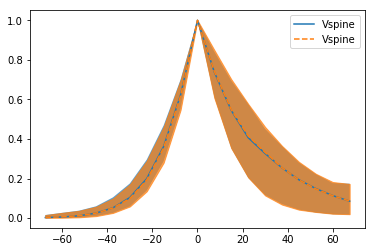

In [16]:
axsp = 0
for lab in labels[:1]:
    plot(shle0[lab][:,0],shle0[lab][:,1+axsp*5],label=lab)
    fill_between(shle0[lab][:,0],shle0[lab][:,2+axsp*5],shle0[lab][:,3+axsp*5],alpha=0.7)
    
axsp = 1
for i,lab in enumerate(labels[:1]):
    plot(shle0[lab][:,0],shle0[lab][:,1+axsp*5],'C'+str(i+1)+'--',label=lab)
    fill_between(shle0[lab][:,0],shle0[lab][:,2+axsp*5],shle0[lab][:,3+axsp*5],color='C'+str(i+1),alpha=0.7)
    
legend()

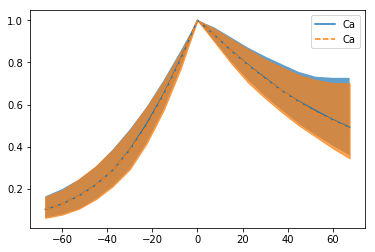

In [17]:
axsp = 0
for lab in labels[-1:]:
    plot(shle0[lab][:,0],shle0[lab][:,1+axsp*5],label=lab)
    fill_between(shle0[lab][:,0],shle0[lab][:,2+axsp*5],shle0[lab][:,3+axsp*5],alpha=0.7)
    
axsp = 1
for i,lab in enumerate(labels[-1:]):
    plot(shle0[lab][:,0],shle0[lab][:,1+axsp*5],'C'+str(i+1)+'--',label=lab)
    fill_between(shle0[lab][:,0],shle0[lab][:,2+axsp*5],shle0[lab][:,3+axsp*5],color='C'+str(i+1),alpha=0.7)
    
legend()